<a href="https://colab.research.google.com/github/g-tumwesigye/tensorflow_participation_assignment-/blob/main/Tensorflow_Participation_Assignment_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Student 1 KAMANZI Serge
student 2 TUMWESIGYE Geofrey

Complete the code as discussed the class :
Load any data of you choice
Make sure you clearly define the X and the Y after loading
Ensure the number of classes is accurate
Add atleast 1 layer with 128 neurons

compilte and fit to data
'''

'\nStudent 1 KAMANZI Serge\nstudent 2 TUMWESIGYE Geofrey\n\nComplete the code as discussed the class :\nLoad any data of you choice\nMake sure you clearly define the X and the Y after loading\nEnsure the number of classes is accurate\nAdd atleast 1 layer with 128 neurons\n\ncompilte and fit to data\n'

**# Importing Libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset

In [ ]:
#import data
#data = pd.read_csv()
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

**Flatten and normalizing Images**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255


**Converting labels to One-Hot Encoding**

In [ ]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

**Building the neural network model**

In [ ]:
num_classes = 10

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**# Compiling the Model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Model training & validation**

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8830 - loss: 0.4206 - val_accuracy: 0.9618 - val_loss: 0.1300
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9653 - loss: 0.1217 - val_accuracy: 0.9699 - val_loss: 0.0981
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9764 - loss: 0.0792 - val_accuracy: 0.9723 - val_loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9732 - val_loss: 0.0834
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9869 - loss: 0.0438 - val_accuracy: 0.9758 - val_loss: 0.0771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9757 - val_loss: 0.0838
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9922 - loss: 0.0270 - val_accuracy: 0.9754 - val_loss: 0.0813
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9942 - loss: 0.0207

**Saving the model**

In [ ]:
model.save('mnist_model.h5')

**Loading the saved model**

In [ ]:
loaded_model = tf.keras.models.load_model('mnist_model.h5')

**Predicting using the loaded model**

In [ ]:
predictions = loaded_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Displaying the model summary**

In [ ]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Visualizing predictions**

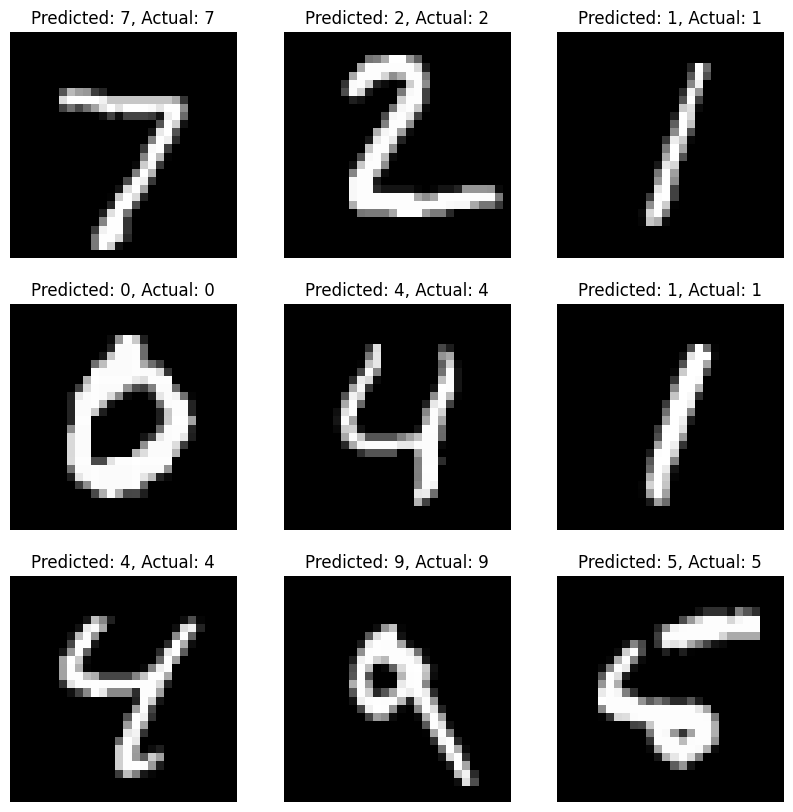

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(Y_test[i])}")
    plt.axis('off')
plt.show()